# Visualizations in Python

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

## Iris Dataset

### Load the data
Load the data from the Iris dataset in Assignment 1. Create your X features and your Y labels.


In [4]:
from sklearn.datasets import load_iris

iris= load_iris()

In [11]:
# Store features matrix in X
X= pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 
                                    'petal_length', 'petal_width'])

#Store target vector in Y
Y= iris.target

In [12]:
# Names of features/columns in iris dataset
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
# Names of target/output in iris dataset
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [16]:
# size of feature matrix
print(iris.data.shape)

(150, 4)


### Train/Test Split the Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

### Explore the Data

In [26]:
# Here we can see there are equal distribution of each Iris species
pd.DataFrame(y_train).value_counts()

1    40
2    33
0    32
dtype: int64

In [27]:
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.869524,3.050476,3.837143,1.232381
std,0.796039,0.409062,1.714265,0.739217
min,4.400000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


/Users/emilykenney/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

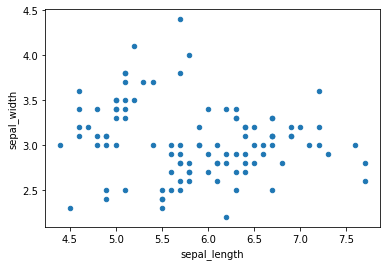

In [28]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
X_train.plot(kind="scatter", x="sepal_length", y="sepal_width")

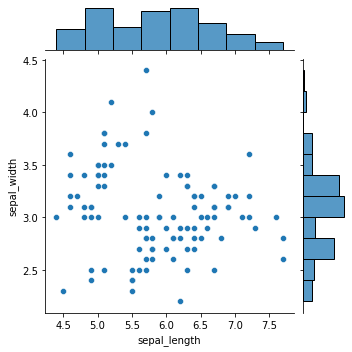

In [31]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="sepal_length", y="sepal_width", data=X_train, size=5)

In [34]:
# add the X and Y together in the same dataframe for coloring manipulations
# create a new dataframe based off of the X_train
# the copy function will make sure we don't point back to the other dataframe by reference
df_train = X_train.copy()
# add a new column called 'Species' that represents the y data
df_train['Species'] = y_train.copy()

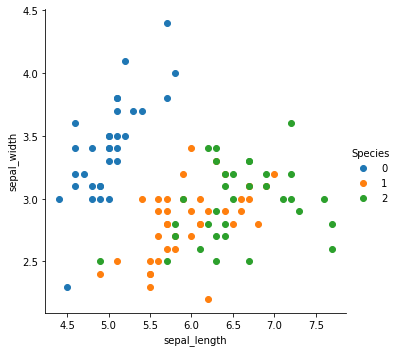

In [35]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(df_train, hue="Species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

<AxesSubplot: xlabel='Species', ylabel='petal_length'>

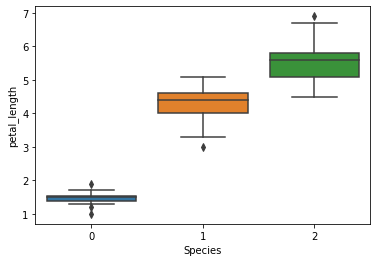

In [36]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="petal_length", data=df_train)

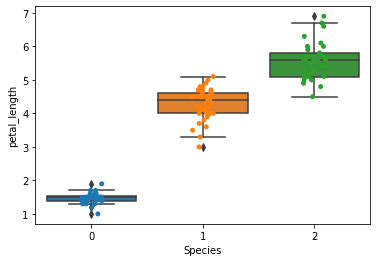

In [38]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="petal_length", data=df_train)
ax = sns.stripplot(x="Species", y="petal_length", data=df_train, jitter=True, edgecolor="gray")

<AxesSubplot: xlabel='Species', ylabel='petal_length'>

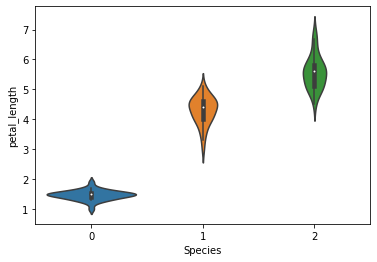

In [39]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="petal_length", data=df_train, size=6)

/Users/emilykenney/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


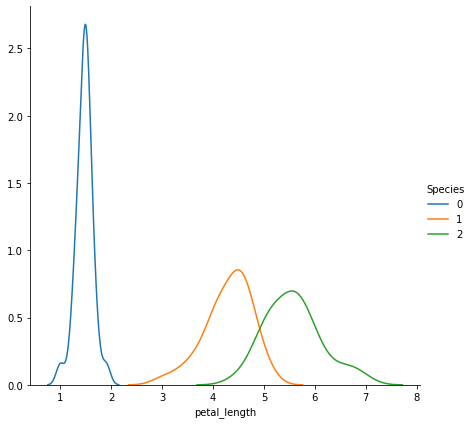

In [40]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(df_train, hue="Species", size=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

/Users/emilykenney/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


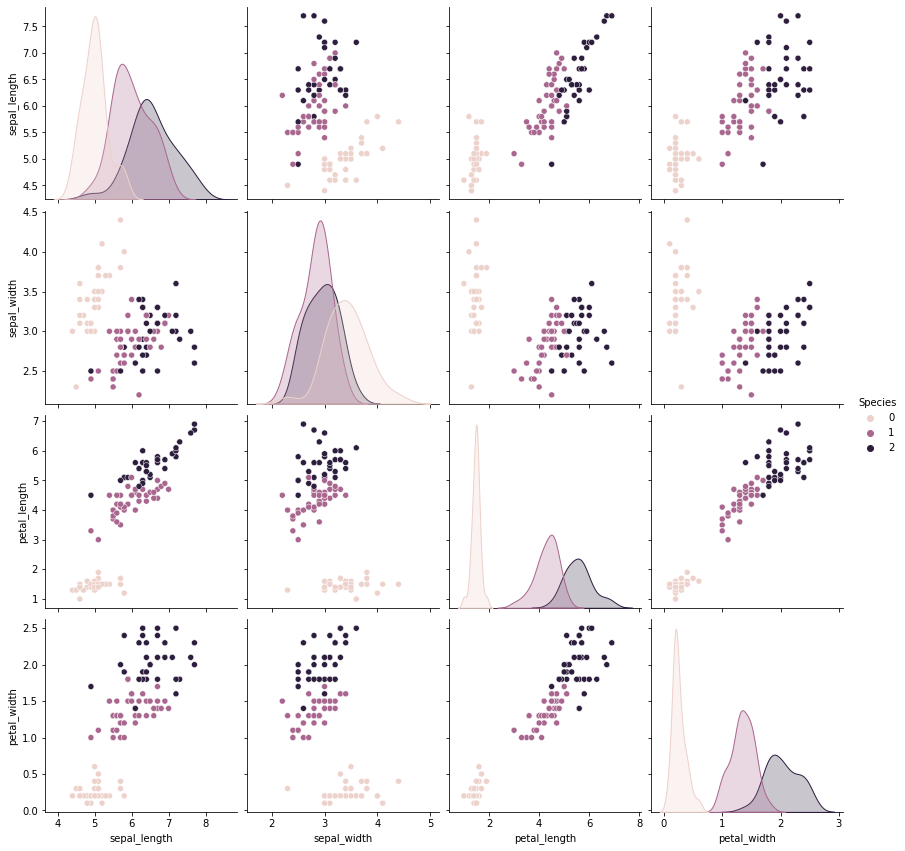

In [42]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(df_train, hue="Species", size=3)

/Users/emilykenney/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


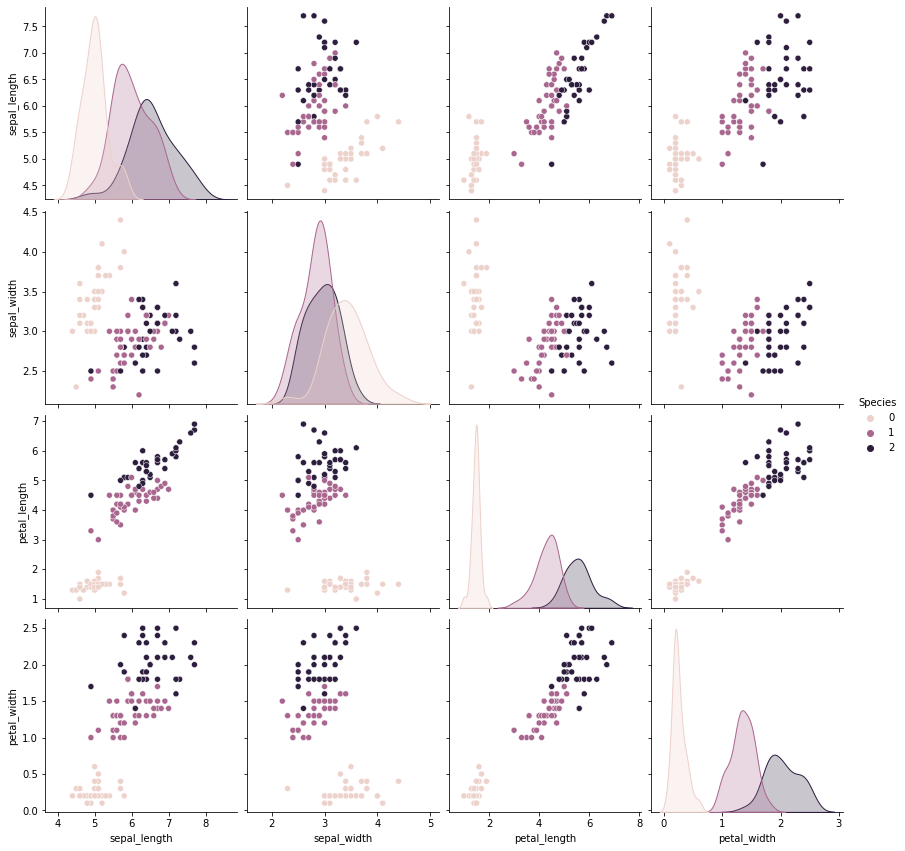

In [43]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(df_train, hue="Species", size=3, diag_kind="kde")

array([[<AxesSubplot: title={'center': 'petal_length'}, xlabel='[Species]'>,
        <AxesSubplot: title={'center': 'petal_width'}, xlabel='[Species]'>],
       [<AxesSubplot: title={'center': 'sepal_length'}, xlabel='[Species]'>,
        <AxesSubplot: title={'center': 'sepal_width'}, xlabel='[Species]'>]],
      dtype=object)

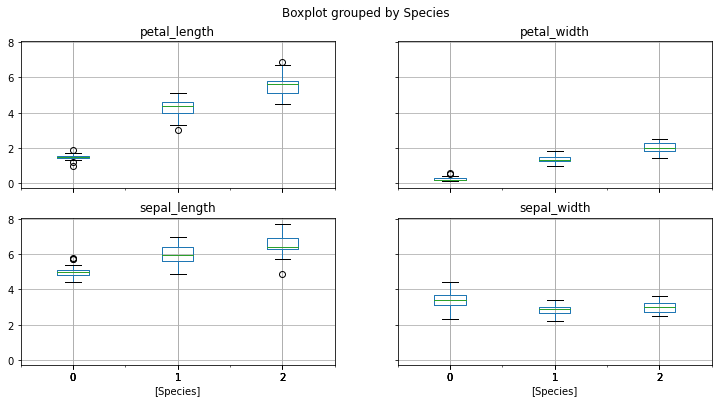

In [45]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
df_train.boxplot(by="Species", figsize=(12, 6))

### Plot a Histogram
Plotting feature histograms is a good way to start building intuition about the data. This gives us a sense of the distribution of each feature, but not how the features relate to each other.

We can also use the `describe` function to look at some aggregate statistics for the 

Use panda's built in datafram hist to create a histogram of each feature with X.hist().
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

In [47]:
df_train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Species'],
      dtype='object')

In [48]:
len(df_train.columns)

5

In [52]:
# the enumerate function can give you an index adn a value to work with
for idx, column_name in enumerate(df_train.columns):
    print(idx, column_name)

0 sepal_length
1 sepal_width
2 petal_length
3 petal_width
4 Species


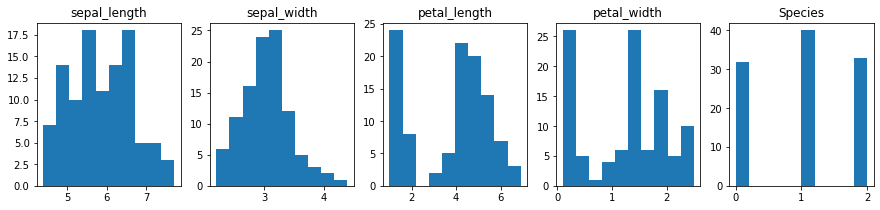

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.869524,3.050476,3.837143,1.232381
std,0.796039,0.409062,1.714265,0.739217
min,4.400000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


In [56]:
# SOME EXAMPLE CODE
plt.figure(figsize=(15, 3))
for idx, column_name in enumerate(df_train.columns):
    plt.subplot(1, 5, idx+1)
    plt.hist(np.array(df_train[column_name]))
    plt.title(column_name)
plt.show()

X_train.describe()